In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

%matplotlib inline

In [117]:
im1 = im = cv2.imread('./ltd/h4.jpg')

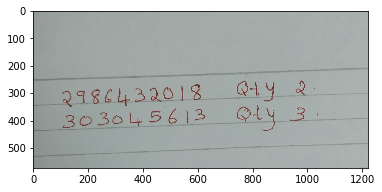

In [118]:
plt.imshow(im)

In [119]:
#grayscale and Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

In [124]:
 #greater than 100 => 0  less than 100 => 255 
ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY_INV)

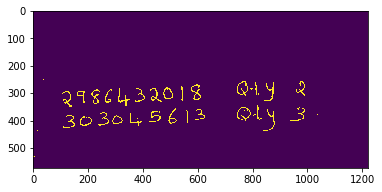

In [125]:
plt.imshow(im_th)

In [126]:
_,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [127]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [128]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    #roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    #nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    #cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

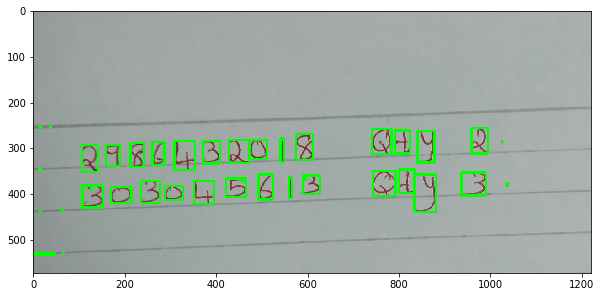

In [129]:
plt.figure(figsize=(10,10))
plt.imshow(im)

In [130]:
type(rects)

list

In [131]:
rects[3]

(61, 435, 4, 2)

In [135]:
len(rects)

40

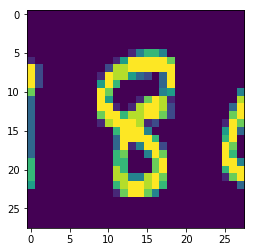

In [143]:
rect = rects[24]

k = cv2.rectangle(im1, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 

# plt.imshow(k)

leng = int(rect[3] * 1.6)
pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
roi = cv2.dilate(roi, (3, 3))
plt.imshow(roi)

IndexError: list index out of range

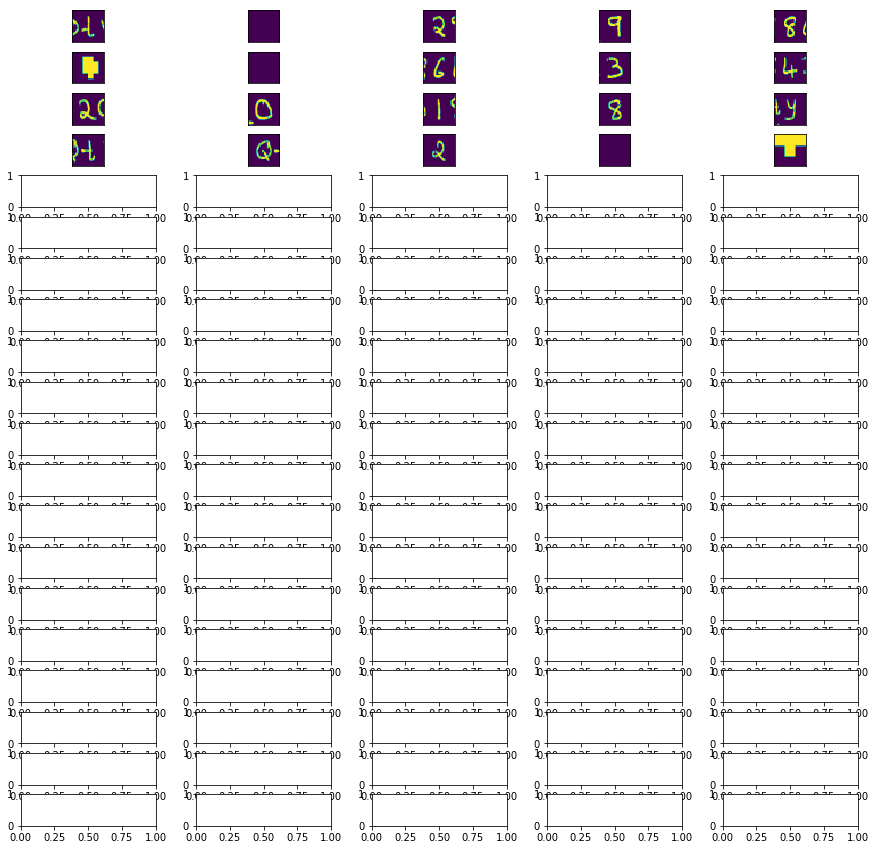

In [134]:
fig, axes = plt.subplots(20,5, figsize = (15,15))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i, ax in enumerate(axes.flat):
          

    rect = rects[i+20]
    
    k = cv2.rectangle(im1, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    
    # plt.imshow(k)
    
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
#     plt.imshow(roi)
    ax.imshow(roi)  
    #Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])